# Partie 1 & 2 - Exploration des données

## Import des librairies

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Partie 1 - Chargement des données
### Fichiers de références :
- prepare_data/data_loader.py

### Chargement des données
- Format de données : coco.json
-> Appel de la fonction load_coco_json contenu dans le module data_loader.py
- Adapte le chemin du fichier coco.json par rapport à ton espace de travail

In [3]:
from data_loader import load_coco_json
path_dir = "/home/fadilatou/PROJETS/wildfire_detection/data"
path_dir_coco = "/home/fadilatou/PROJETS/wildfire_detection/data/_annotations_clean.coco.json"

coco_data = load_coco_json(path_dir_coco)

display(coco_data.keys())
display("Image 1 : ", coco_data['images'][:1])
display("Annotations 1 : ", coco_data['annotations'][:1])
display("Catégorie : ", coco_data['categories'])


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

'Image 1 : '

[{'id': 0,
  'license': 1,
  'file_name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf.479904c9e54c6ba121689341598bf3ed.jpg',
  'height': 860,
  'width': 1200,
  'date_captured': '2025-09-14T12:06:19+00:00',
  'extra': {'name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR.jpg'}}]

'Annotations 1 : '

[{'id': 0,
  'image_id': 1,
  'category_id': 1,
  'bbox': [277, 207, 568.95, 591.79],
  'area': 336698.921,
  'segmentation': [],
  'iscrowd': 0}]

'Catégorie : '

[{'id': 0, 'name': 'wildfire', 'supercategory': 'none'},
 {'id': 1, 'name': 'fire', 'supercategory': 'wildfire'}]

### Mise en Dataframe
Etapes :
- Mettre en dataframe chaque liste du json en dataframes distincts ('images', 'annotations' et 'categories)
- Fusionner les annotations avec les informations des images
- Ajouter le nom de la catégories à chaque annotations

Données filtrées :
- id_ann -> id de l'annotation
- image_id -> id de l'image correspondante
- category_id -> id de la catégorie
- bbox -> coordonnées de la boîte englobante [x, y, largeur (width), hauteur(height)]
- area -> Surface de l'objet annoté en pixel (width*height)
- segmentation -> Liste de points décrivant la forme exacte de l'objet
- iscrowd -> Indique si l'objet fait partie d'un groupe dense (=1) ou isolé (=0)
- file_name -> nom du fichier image
- width / height -> Dimension de l'image en pixel
- id -> Indentifiant interne au dataframe
- category_name -> nom de la catégorie (ex: feu)



In [ ]:
from data_loader import coco_to_df

df_images, df_annotations, df_categories = coco_to_df(coco_data)

display("Nb d'images : ", len(df_images))
display("Nb annotations : ", len(df_annotations))
display("Nb catégories : ", df_categories)

"Nb d'images : "

500

'Nb annotations : '

959

'Nb catégories : '

,id,name,supercategory
0,0,wildfire,none
1,1,fire,wildfire


## Partie 2 - Exploration & nettoyage des données


### A. Explorer les données pour en extraire les informations suivantes
- Nombre total d'image
- Nombre total d'annotations
- Quelles sont les catégories ?
- Nombre d'image par catégories
- Statistiques sur le nombre d'annotation par image
=> Ajouter 4 fonctions d'explorations dans le fichier prepare_data/data_explorer.py

In [ ]:

from data_explorer import count_ann, count_images, ann_stats_per_img, stats_summary

nb_img = count_images(df_images)
display(nb_img)

nb_ann = count_ann(df_annotations)
display(nb_ann)

ann_per_img = ann_stats_per_img(df_annotations)
display(ann_per_img)

display(stats_summary(df_images, df_annotations))

500

959

count    493.000000
mean       1.945233
std        1.405218
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
dtype: float64

Nombre d'images : 500
Nombre d'annotations : 959
Nombre moyen d'annotations par image : 1.945233265720081


(None, None, None)

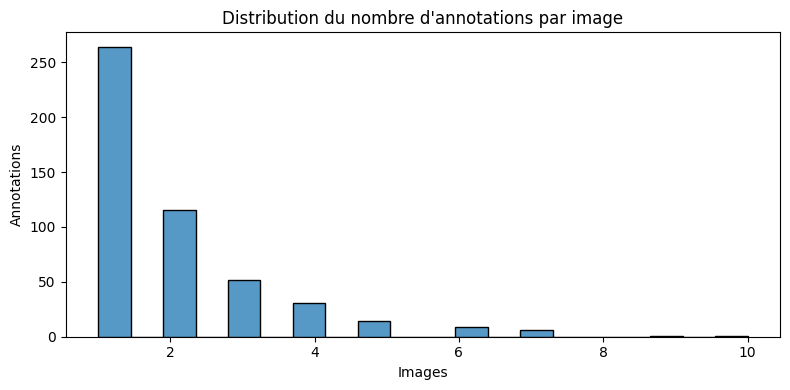

In [ ]:

plt.figure(figsize=(8,4))

img_ann = df_annotations.groupby('image_id').size().reset_index(name="n_annotations")
sns.histplot(img_ann['n_annotations'], bins=20)
plt.title("Distribution du nombre d'annotations par image")
plt.xlabel("Images")
plt.ylabel("Annotations")
plt.tight_layout()
plt.show()

## Vérification incohérences des données

- Ecrire une fonction qui renvoie les extensions des fichiers
- Ecrire une fonction qui vérifie la cohérence entre les images disponibles et les images présentes dans _annotations.coco.json
- Écrire une fonction qui renvoie la liste des images sans annotations s’il y en a
- Créer une liste d’id unique dans les annotations (pandas unique)
- Filtrer le dataframe d’images en ne gardant que les images telles que l’id ne soient pas dans la liste d’id unique (exemple pandas)
- Écrire une fonction qui renvoie les annotations ne correspondant à aucune image
- Ecrire une fonction qui détecte les valeurs aberrantes pour les annotations (ex : hauteur == 0 et largeur != 0, etc)




In [ ]:
from data_cleaner import *

print(get_image_extensions(path_dir))

display(check_image_annotation_coherence(df_images, path_dir))

display(img_without_ann(df_images, df_annotations))

display(annotations_without_images(df_images,df_annotations))

display(detect_invalid_bboxes(df_annotations))



['.jpg', '.json']


(set(), {'_annotations.coco.json'})

,id,license,file_name,height,width,date_captured,extra
0,0,1,cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6e1qges001kgk555z158f33_2_FALSE_CO...
96,96,1,cl6kf5xzo000gc4552qc8hhcc_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6kf5xzo000gc4552qc8hhcc_2_FALSE_CO...
118,118,1,cl6e2kygp002egk55asrs2brz_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6e2kygp002egk55asrs2brz_1_TRUE_COL...
122,122,1,cl6e3enfn003sgk554uim9wo6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6e3enfn003sgk554uim9wo6_1_TRUE_COL...
209,209,1,cl6kfx47x001tc45578ts0yz6_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6kfx47x001tc45578ts0yz6_2_FALSE_CO...
290,290,1,cl6b5x63r005il4551chxdt93_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6b5x63r005il4551chxdt93_2_FALSE_CO...
451,451,1,cl6b5myi60048l45530d5anq4_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6b5myi60048l45530d5anq4_1_TRUE_COL...


,id,image_id,category_id,bbox,area,segmentation,iscrowd


,id,image_id,category_id,bbox,area,segmentation,iscrowd


## Utilisation de Fiftyone pour visualiser les images avec annotations

- Cf. visualisation.py

In [ ]:
import fiftyone as fo

dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path='/home/gaetansimplon/wildfire_detection/data', # Dossier contenant les images
    labels_path='/home/gaetansimplon/wildfire_detection/data/_annotations_clean.coco.json'
)

session = fo.launch_app(dataset)

/home/gaetansimplon/wildfire_detection/.venv311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 100% |█████████████████| 500/500 [1.1s elapsed, 0s remaining, 438.2 samples/s]         
